In [1]:
import tensorflow as tf
import import_ipynb
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers

from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
import cv2
import os 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import imshow
%matplotlib inline

from keras import backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


In [2]:
train = ImageDataGenerator(rescale= 1./255)
validation = ImageDataGenerator(rescale= 1./255)
test= ImageDataGenerator(rescale= 1./255)

In [3]:
train_dataset= train.flow_from_directory('basedata/training', 
                                         target_size= (224,224),
                                         class_mode= 'categorical'
                                        )
validation_dataset= validation.flow_from_directory('basedata/validation', 
                                                   target_size= (224, 224),
                                                   class_mode= 'categorical'
                                                  )  

test_dataset= test.flow_from_directory('basedata/test',
                                       target_size= (224, 224),
                                       class_mode= 'categorical') 




Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [4]:
model_d= tf.keras.applications.densenet.DenseNet121()

In [5]:
x= model_d.layers[-3].output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

predictions= Dense(2, activation = 'softmax')(x)
model= Model(inputs= model_d.input, outputs= predictions)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block12_concat (Concatena (None, 7, 7, 896)    0           conv5_block11_concat[0][0]       
                                                                 conv5_block12_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block13_0_bn (BatchNormal (None, 7, 7, 896)    3584        conv5_block12_concat[0][0]       
__________________________________________________________________________________________________
conv5_block13_0_relu (Activatio (None, 7, 7, 896)    0           conv5_block13_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block13_1_conv (Conv2D)   (None, 7, 7, 128)    114688      conv5_block13_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_bloc

In [7]:
for layer in model.layers[:-9]:
    layer.trainable= False

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(optimizer= Adam(lr= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_dataset, 
                   steps_per_epoch= 20, 
                   validation_data= validation_dataset, 
                   validation_steps= 3,
                   shuffle=2, 
                   verbose=1, 
                   epochs = 10, 
                   batch_size = 64)

Epoch 1/10
20/20 [==============================] - 112s 6s/step - loss: 0.7232 - accuracy: 0.7359 - val_loss: 0.6872 - val_accuracy: 0.6458
Epoch 2/10
20/20 [==============================] - 114s 6s/step - loss: 0.3971 - accuracy: 0.8438 - val_loss: 0.5331 - val_accuracy: 0.7292
Epoch 3/10
20/20 [==============================] - 107s 5s/step - loss: 0.3683 - accuracy: 0.8639 - val_loss: 0.4853 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 110s 5s/step - loss: 0.2649 - accuracy: 0.9031 - val_loss: 0.3406 - val_accuracy: 0.8125
Epoch 5/10
20/20 [==============================] - 107s 5s/step - loss: 0.2997 - accuracy: 0.8972 - val_loss: 0.3435 - val_accuracy: 0.8021
Epoch 6/10
20/20 [==============================] - 108s 5s/step - loss: 0.2372 - accuracy: 0.9203 - val_loss: 0.2354 - val_accuracy: 0.8854
Epoch 7/10
20/20 [==============================] - 117s 6s/step - loss: 0.2244 - accuracy: 0.9234 - val_loss: 0.1891 - val_accuracy: 0.8854
Epoch 8/10
20

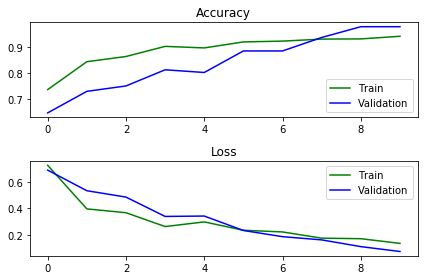


train_accuracy :  [0.7359374761581421, 0.84375, 0.8639240264892578, 0.903124988079071, 0.8971518874168396, 0.9203125238418579, 0.9234374761581421, 0.9312499761581421, 0.9319620132446289, 0.942187488079071]
valid_accuracy :  [0.6458333134651184, 0.7291666865348816, 0.75, 0.8125, 0.8020833134651184, 0.8854166865348816, 0.8854166865348816, 0.9375, 0.9791666865348816, 0.9791666865348816]
train_err :  [0.7232202887535095, 0.39705342054367065, 0.36834239959716797, 0.2648875117301941, 0.29967162013053894, 0.23717491328716278, 0.22441944479942322, 0.17798951268196106, 0.17394334077835083, 0.13885077834129333]
valid_err :  [0.68723064661026, 0.5330628752708435, 0.4853382110595703, 0.3405947983264923, 0.3435119092464447, 0.23544740676879883, 0.18908703327178955, 0.1650661826133728, 0.11464852094650269, 0.07820432633161545]


In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)
print("valid_err : ", valid_err)

In [39]:
test_labels= test_dataset.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
test_dataset.class_indices

{'Exudates': 0, 'Normal': 1}

In [41]:
predictions= model.predict(test_dataset, steps=1, verbose= 0)


In [42]:
for i in predictions:
    print(i)

[0.0016039 0.9983961]
[0.99832267 0.0016773 ]
[9.8385324e-05 9.9990165e-01]
[0.9974656  0.00253435]
[1.3522003e-04 9.9986482e-01]
[5.814252e-04 9.994186e-01]
[0.00442202 0.99557805]
[0.9964295  0.00357058]
[0.01355343 0.9864466 ]
[9.9996495e-01 3.4998880e-05]
[0.08002737 0.9199726 ]
[0.98994654 0.01005348]
[0.00174017 0.99825984]
[8.243635e-04 9.991756e-01]
[3.5466130e-07 9.9999964e-01]
[0.00755176 0.9924482 ]
[3.6335794e-07 9.9999964e-01]
[0.9983918 0.0016082]
[0.9955575  0.00444257]
[0.3796633 0.6203368]
[0.47810996 0.52189004]
[0.23686641 0.7631335 ]
[2.2277104e-06 9.9999774e-01]
[0.9892729  0.01072711]
[0.6820967  0.31790328]
[0.11104451 0.8889555 ]
[9.9998522e-01 1.4736943e-05]
[0.01619309 0.98380697]
[1.480961e-04 9.998518e-01]
[9.9998713e-01 1.2873345e-05]


In [43]:
rounded_predictions= np.argmax(predictions, axis=-1)

In [44]:
for i in rounded_predictions:
    print(i)

1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
1
0


In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

score, accuracy = model.evaluate(test_dataset,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 3ms/step - loss: 0.7687 - accuracy: 0.8000
Test score: 0.7686911225318909
Test accuracy: 0.800000011920929
